In [1]:
from scipy.stats import multivariate_normal
from non_local_detector import Environment
import numpy as np

import matplotlib.pyplot as plt
from track_linearization import make_track_graph, get_linearized_position

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

node_positions = [
    (0, 0),  # xy position of node 0
    (30, 0),  # xy position of node 1
    (30, 30),  # xy position of node 2
    (0, 30),  # xy position of node 3
]

edges = [
    (0, 1),  # connects node 0 and node 1
    (0, 3),  # connects node 0 and node 3
    (1, 2),  # connects node 1 and node 2
]

track_graph = make_track_graph(node_positions, edges)

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:54: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


array([ True, False,  True, False,  True])

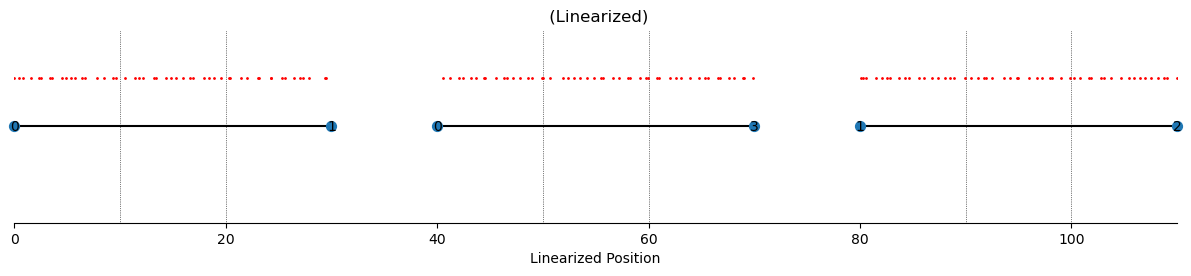

In [2]:
env = Environment(
    place_bin_size=10,
    track_graph=track_graph,
    edge_order=edges,
    edge_spacing=10,
).fit(position=position)

lin_pos_df = get_linearized_position(
    position,
    track_graph=track_graph,
    edge_order=edges,
    edge_spacing=10,
)

env.plot_grid()

plt.scatter(lin_pos_df["linear_position"], np.ones_like(lin_pos_df["linear_position"]) * 0.05, c="red", s=1, zorder=10)
env.is_track_interior_

In [3]:
env.n_dims

1

In [6]:
env.nd_index_to_flat(1)

np.int64(1)

In [11]:
env.bin_index_to_nd(1)

(np.int64(0), np.int64(1))

array([[ True,  True,  True,  True],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True,  True,  True,  True]])

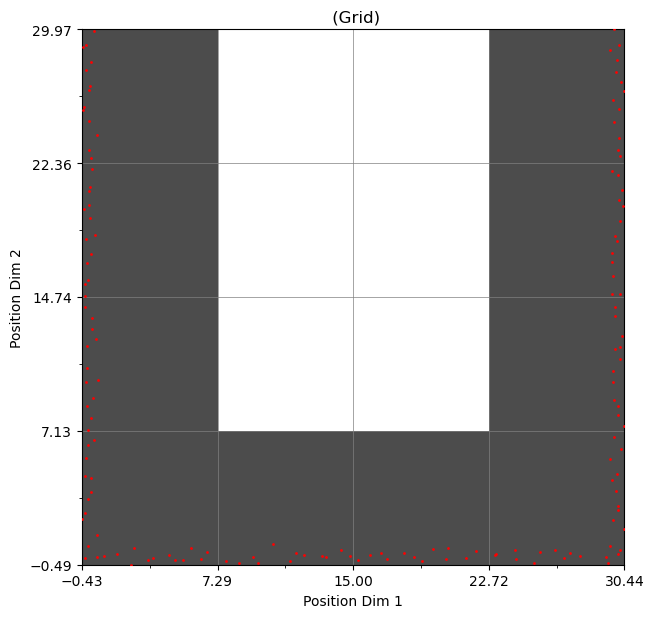

In [7]:
env = Environment(
    place_bin_size=10,
).fit(position=position)

env.plot_grid()

plt.scatter(position[:, 0], position[:, 1], c="red", s=1, zorder=10)
env.is_track_interior_

In [8]:
env.n_dims

2

In [ ]:
env.nd_index_to_flat((0, 1))


np.int64(1)

In [12]:
env.bin_index_to_nd(1)

(np.int64(0), np.int64(1))